<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorio%201/Sesi%C3%B3n%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

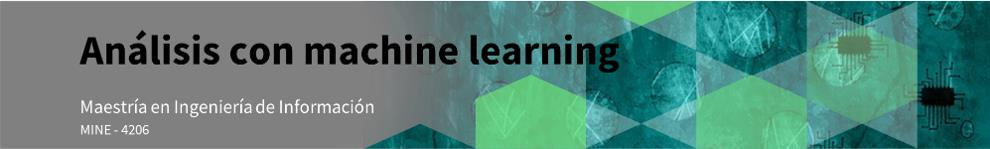

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](#scrollTo=1ttPWxrdUToF)<br>
[Entendimiento del negocio.](#scrollTo=mDFy0j1eggmm)<br>
[0. Instalación de librerías.](#scrollTo=VjLUweXbT9aj)<br>
[1. Importar librerías](#scrollTo=_YBAB_TExrvY)<br>
[2. Introducción a los datos.](#scrollTo=E4jCt71BUCiy)<br>
&nbsp;&nbsp;[2.1. Exploración básica de la información.](#scrollTo=R4vkzkrq14PB)<br>
&nbsp;&nbsp;[2.2. Análisis exploratorio de datos (EDA).](#scrollTo=XBIYKQz_4ZQI)<br>
&nbsp;&nbsp;[2.3. Preparación de los datos.](#crollTo=V7kcqRORJpFl)<br>
[3. Modelamiento.](#scrollTo=VuVy2tMSUG_3)<br>
&nbsp;&nbsp;[3.1. Regresión lineal.](#scrollTo=Bxp2ddxtQQoe)<br>
&nbsp;&nbsp;[3.2. Regresión polinomial.](#scrollTo=QKxPaOdBQUtV)<br>
[4. Despliegue.](#scrollTo=tZOVnPAbQbSR)<br>
[5. Preguntas.](#scrollTo=iFnQ0xgaQegd)<br>

---
# Contexto y objetivos.

Las emisiones de CO2 tienen importantes impactos ambientales. La acumulación de CO2 en la atmósfera contribuye al efecto invernadero, atrapando calor y provocando el calentamiento global. Esto conduce a diversos efectos adversos, incluido el aumento de las temperaturas globales, el aumento del nivel del mar, cambios en los patrones climáticos y alteraciones de los ecosistemas. Las consecuencias a largo plazo del cambio climático pueden afectar negativamente la salud humana, la agricultura, la biodiversidad y los sistemas socioeconómicos.

Por tanto, reducir las emisiones de CO2 es crucial para mitigar el cambio climático y minimizar sus efectos nocivos sobre el medio ambiente y el bienestar humano. Esto implica hacer la transición a fuentes de energía más limpias y renovables, mejorar la eficiencia energética, adoptar prácticas sostenibles y promover esfuerzos de conservación.
El set de datos reúne información de emisiones de automotores e información de consumo de combustible.

**Objetivos**:
* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una Regresión Lineal.
* Familiarizarse con la herramienta de Jupyter Notebook.

**Datos**: Información obtenida de [CO2 Emissions](https://www.kaggle.com/datasets/bhuviranga/co2-emissions).

# Entendimiento del negocio.

Con apoyo del negocio ha sido posible elaborar el siguiente diccionario de datos:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **Make** | Nombre del fabricante de automotores. |
| **Model** | Modelo del automotor. |
| **Vehicle Class** | Clase de vehículo. |
| **Engine Size (L)** | Tamaño del motor. Las unidades están expresadas en litros. |
| **Transmission** | Tipo de transmisión del vehículo, automática o manual. |
| **Fuel Type** | Tipo de combustible: *Regular Gasoline* (X), *Premium Gasoline* (Z), *Ethanol* (E), *Diesel* (D), *Natural Gas* (N). |
| **Fuel Consumption City (L/100km)** | Consumo del vehículo en ciudad. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Hwy (L/100 km)** | Consumo del vehículo en carretera. Las unidades están expresadas en litros por kilómetro. |
| **Fuel Consumption Comb (L/100 km)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en litros por kilómetro.|
| **Fuel Consumption Comb (mpg)** | Consumo del vehículo en ciudad y en carretera. Las unidades están expresadas en millas por galón. |
| **CO2 Emissions(g/km)** | Cantidad de gramos emitidos de C02 por kilometro. |

---
# 0. Instalación de librerías.

Las librerías que se van a utilizar, por lo general se tienen que instalar desde consola mediante el comando `pip`, de esta forma estarán disponibles  dentro del ambiente donde se está ejecutando el Notebook. Sin embargo, si se encuentran en un ambiente compartido como Google Colab o simplemente desean realizar la instalación de los paquetes desde el mismo notebook lo pueden hacer con el siguiente código

```
!pip install [nom_paquete]
```

Por ejemplo:
```
!pip install pandas
```

Exploración profunda de datos

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=240df04385d24eb8960f7735bd0e0520b91fc9f7f880280beb6f1440d619a8f8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's depende

Generación de gráficos

In [2]:
!pip install plotly

---
# 1. Importar librerías

In [3]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

---
# 2. Introducción a los datos.

El negocio ha hecho la entrega de la información en un archivo plano en formato csv, el cual cargaremos a continuación:

In [4]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202410_AML/main/Laboratorio%201/CO2_Emissions.csv'

data = pd.read_csv(url)

Para estar seguros de la carga de la información, visualizaremos las primeras 20 filas:

In [5]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Antes de empezar a hacer el split de datos, realizamos ciertas transformaciones necesarias en los datos. Como la estandarización del tipo de transmisión, el tipo de combustible y la eliminación de filas duplicadas.

In [6]:
# Estandarizacion tipo de transmisión
data['Transmission'] = data['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')

# Estandarización tipo de combustible
data['Fuel Type'] = data['Fuel Type'].replace(['X', 'Z', 'E', 'D', 'N'], ['Regular Gasoline','Premium Gasoline','Ethanol','Diesel','Natural Gas'])

Para poder realizar el entrenamiento de nuestros algoritmos. Primero necesitaremos dividir nuestros datos en datos de entrenamiento (train) y datos de evaluación (test). Esto con el fin de poder descubrir como le iria al modelo entrenado con datos de la población que no ha conocido antes. Por lo general, se recomienda realizar un partición aleatoria y dejar una proporción $80\% - 20\%$. Sin embargo, estas divisiones pueden variar dependiendo el tipo de datos y el entrenamiento que estemos desarrollando.

El parámetro `random_state` corresponde a la reproducibilidad conforme a lo visto en clase.

In [7]:
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3146,PORSCHE,CAYMAN GT4,TWO-SEATER,3.8,6,Manual,Premium Gasoline,13.3,10.1,11.8,24,277
4639,CHRYSLER,300 AWD FFV,FULL-SIZE,3.6,6,Automatic,Regular Gasoline,12.8,8.7,11.0,26,258
5457,ACURA,MDX Hybrid AWD,SUV - SMALL,3.0,6,Automatic,Premium Gasoline,9.1,9.0,9.0,31,210
1003,TOYOTA,TACOMA,PICKUP TRUCK - SMALL,4.0,6,Manual,Regular Gasoline,14.5,11.3,13.1,22,301
5583,BUICK,Envision AWD,SUV - SMALL,2.5,4,Automatic,Regular Gasoline,11.1,8.6,10.0,28,234


## 2.1. Exploración básica de la información.

Nombres de las columnas en la información:

In [8]:
train.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

La información descriptiva de los datos de entrada es la siguiente:

In [9]:
train.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000
mean,3.154062,5.609682,12.542620,9.037035,10.965098,27.525220,250.518619
std,1.359028,1.826665,3.506176,2.227830,2.896409,7.284553,58.973309
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.000000,7.500000,8.900000,22.000000,207.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5908 entries, 3146 to 5725
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5908 non-null   object 
 1   Model                             5908 non-null   object 
 2   Vehicle Class                     5908 non-null   object 
 3   Engine Size(L)                    5908 non-null   float64
 4   Cylinders                         5908 non-null   int64  
 5   Transmission                      5908 non-null   object 
 6   Fuel Type                         5908 non-null   object 
 7   Fuel Consumption City (L/100 km)  5908 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 10  Fuel Consumption Comb (mpg)       5908 non-null   int64  
 11  CO2 Emissions(g/km)               5908 non-null   int64  
dtypes: 

Tamaño de la información:

In [11]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 12 y el número de instancias es: 5908


De los 12 atributos, observamos 7 son numéricos y los 5 restantes categóricos.

Verificamos datos nulos mediante una tabulación porcentual por columna:

In [12]:
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64

## 2.2. Análisis exploratorio de datos (EDA).

Comportamiento de las marcas

In [13]:
train_0 = data['Make'].value_counts()

In [14]:
train_0.info()

<class 'pandas.core.series.Series'>
Index: 42 entries, FORD to SRT
Series name: Make
Non-Null Count  Dtype
--------------  -----
42 non-null     int64
dtypes: int64(1)
memory usage: 672.0+ bytes


In [15]:
fig = px.bar(data, x=train_0.index, y=train_0.values)
fig.show()

Verificamos el comportamiento de los datos numéricos

<Figure size 2500x2000 with 0 Axes>

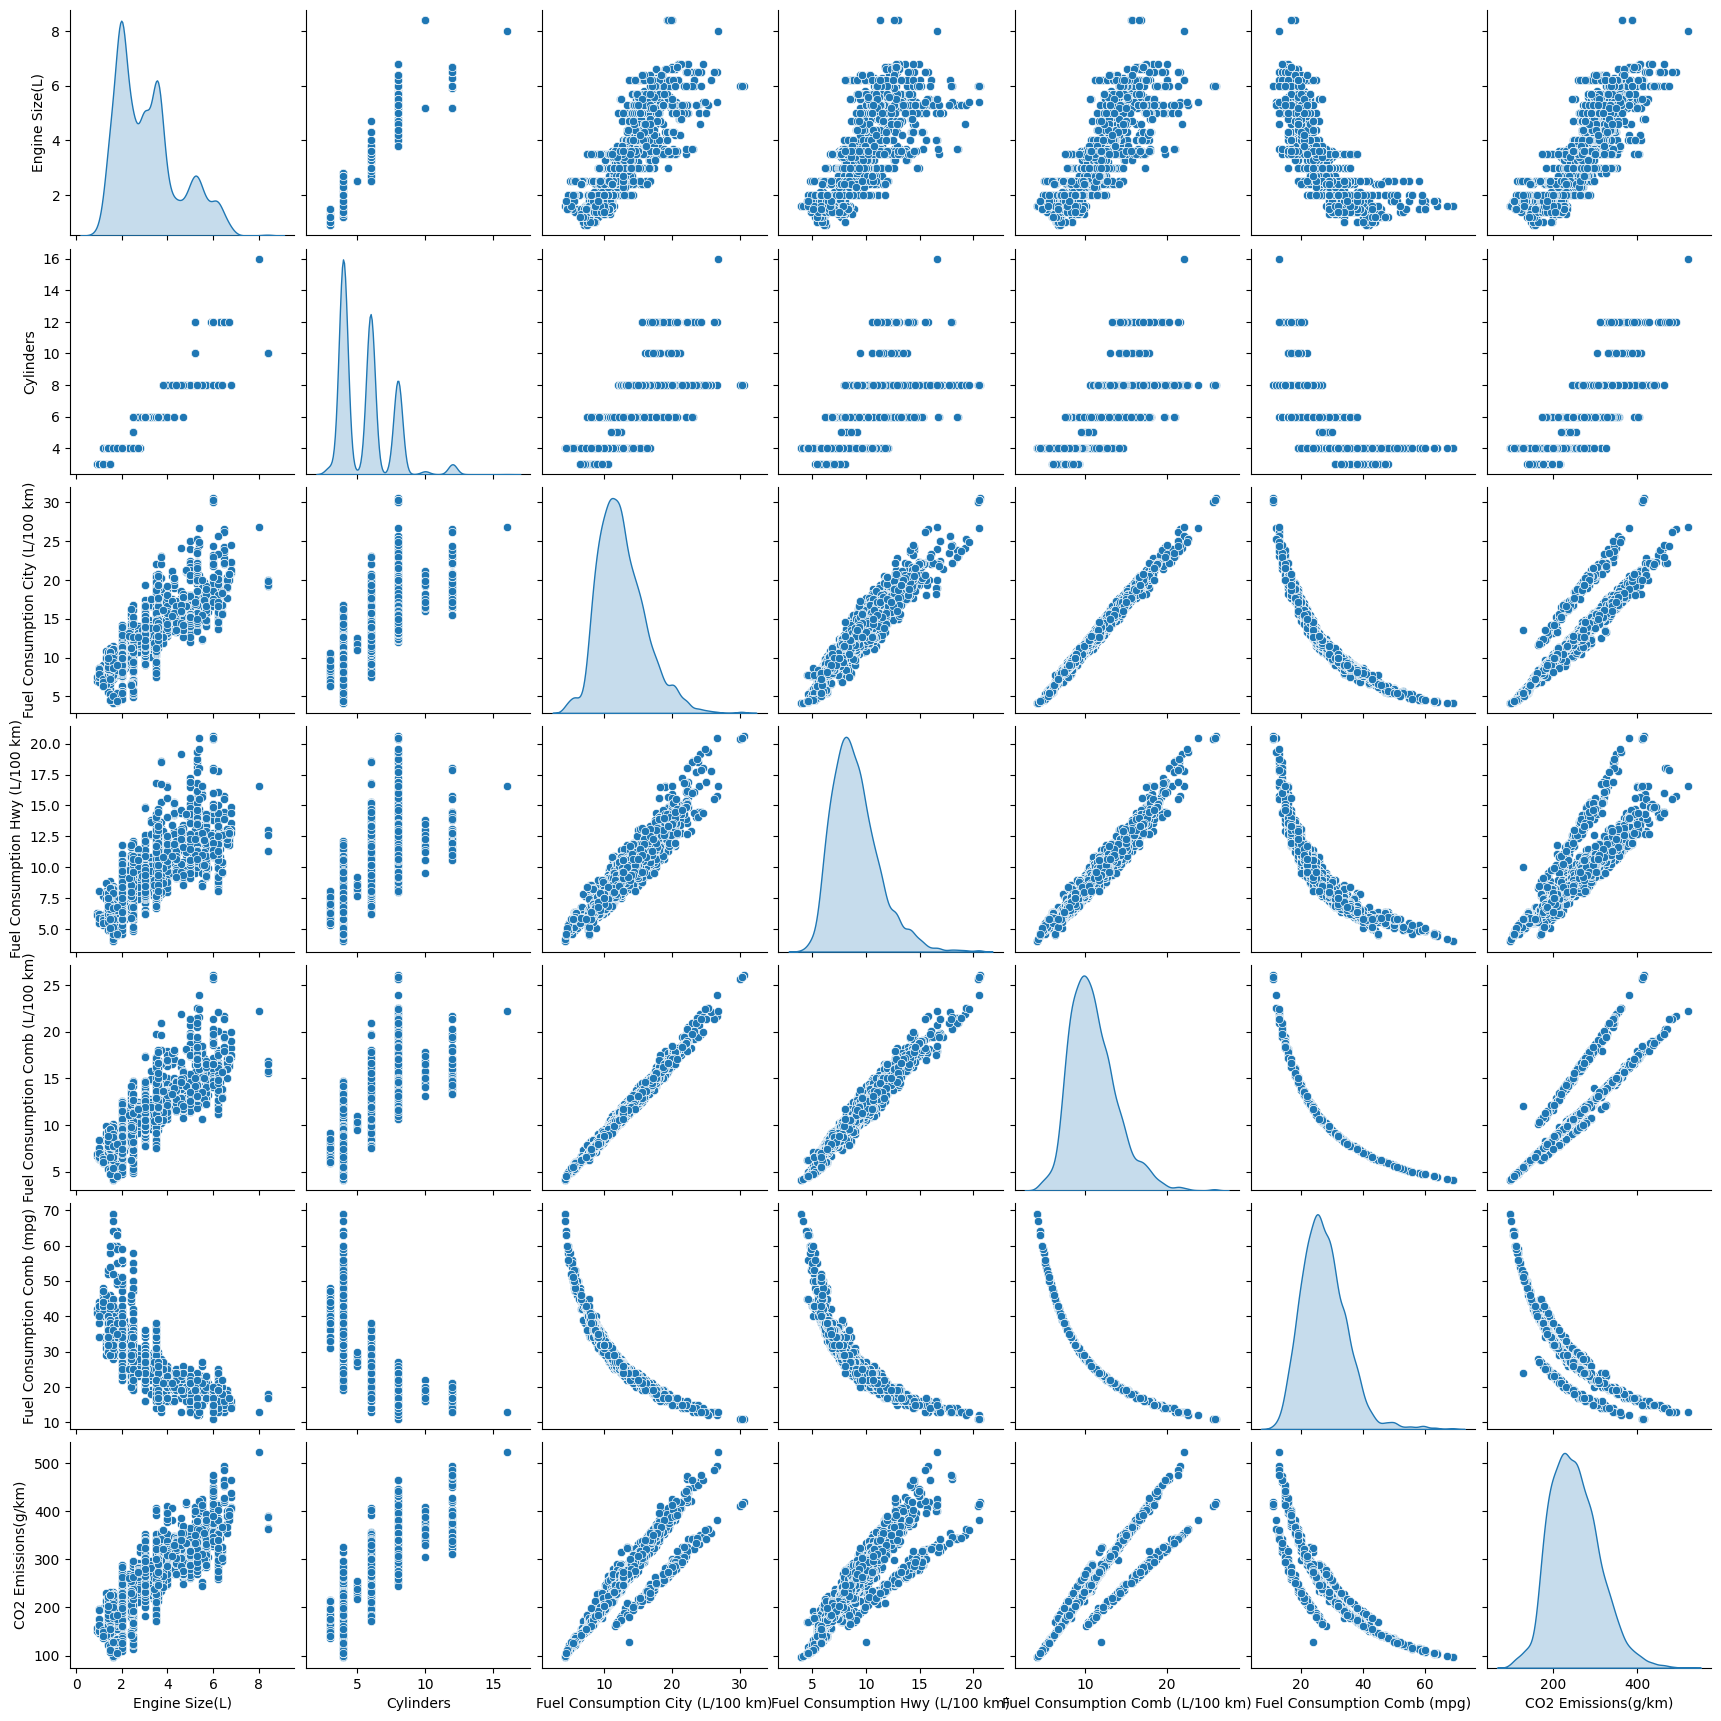

In [16]:
plt.figure(figsize=(25, 20))
train_num = train[[ 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]

sns.pairplot(train_num, diag_kind='kde')
plt.show()

Visualización gráfica de variables categóricas.

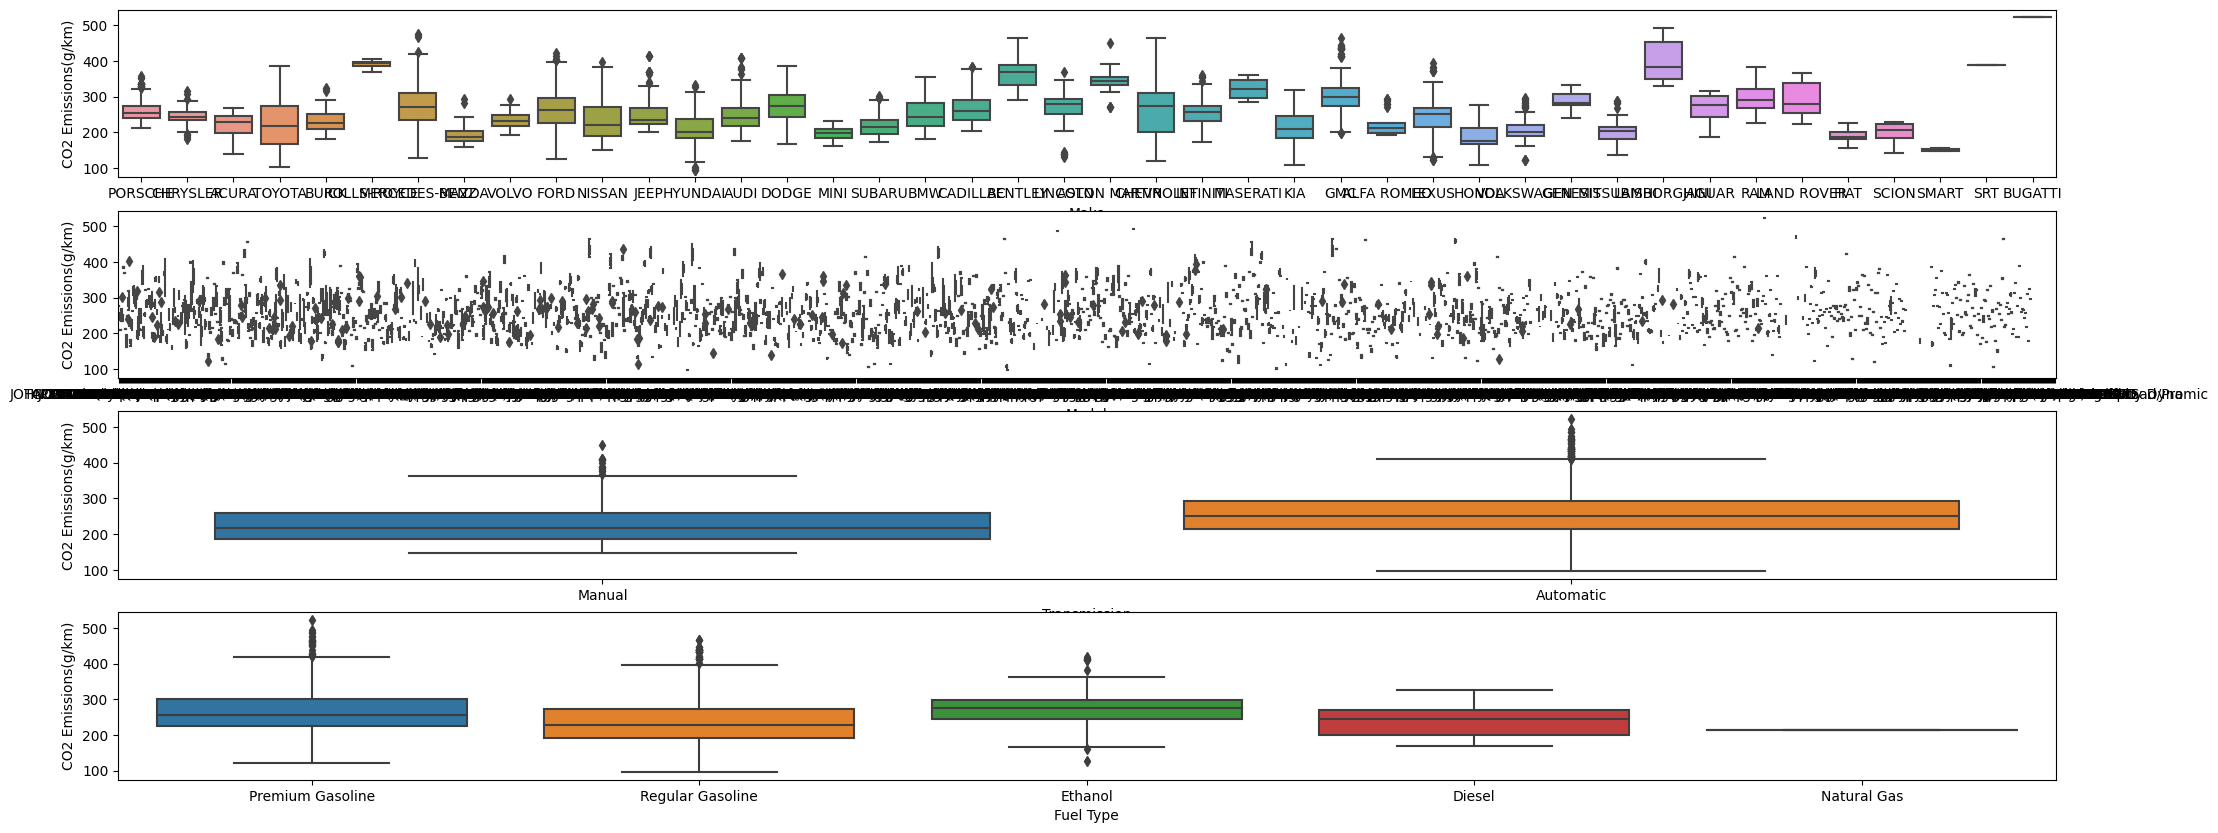

In [17]:
plt.figure(figsize=(25, 10))
plt.subplot(4, 1, 1)
sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=train)
plt.subplot(4, 1, 2)
sns.boxplot(x='Model', y='CO2 Emissions(g/km)', data=train)
plt.subplot(4, 1, 3)
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=train)
plt.subplot(4, 1, 4)
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=train)
plt.show()

Vemos alta cardinalidad para la variable `Model`. Genera una dificl interpretación y problemas de eficiencia en el modelo.

In [18]:
drop_fields = ['Model']

In [19]:
train = train.drop(drop_fields, axis = 1)

Verificamos la correlación de las variables:

<ipython-input-20-8f2638742c90>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



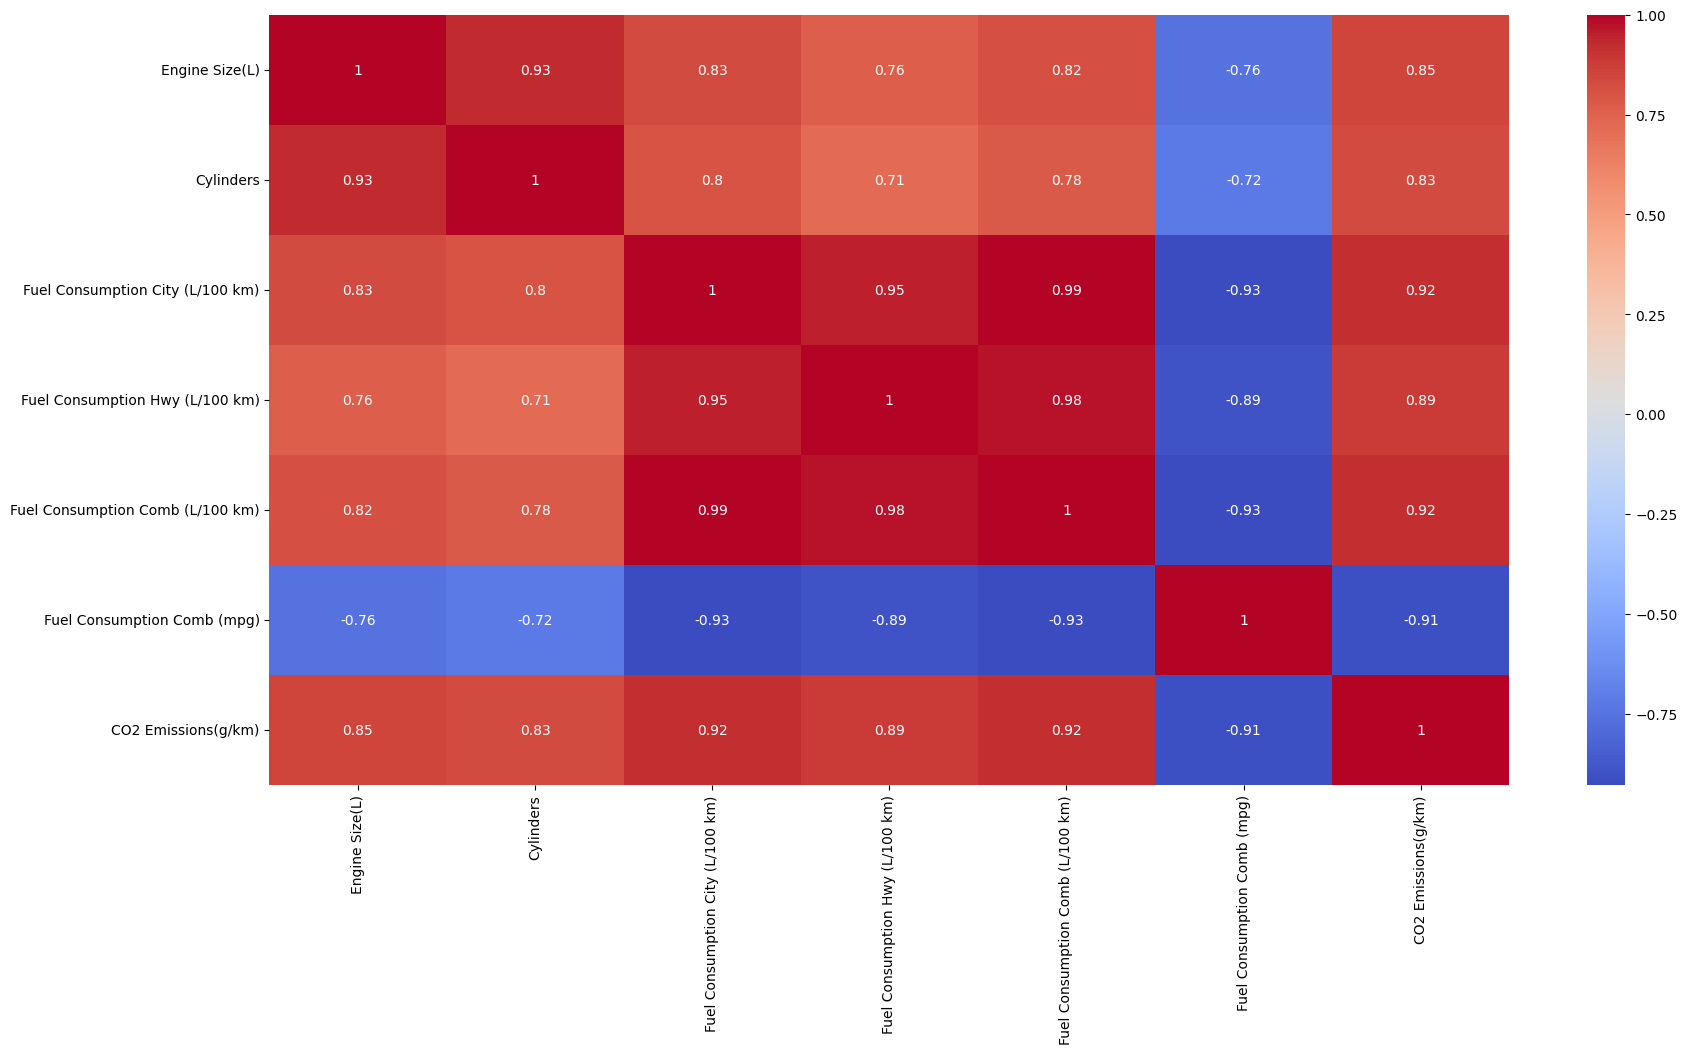

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True, cmap="coolwarm")
plt.show()

## 2.3. Exploración profunda de información

Veamos una breve distribución de los datos usando pandas-profiling

In [21]:
#report = data.profile_report(html={'style':{'full_width':True}})
#report

## 2.4. Insights

1. Bastantes autos AWD, 4WD, Coupe
2. Cerca del 17% de vehiculos pertenecen a SUV's pequeños
3. Bugatti Chiron es el auto que más gramos de CO2 produce por cada 100km
4. El auto menos eficiente en cuanto a consumo por 100km en ciudad es una Chevrolet Van-Passenger

## 2.5. Preparación de los datos.

Teniendo en cuenta las recomendaciones anteriores, eliminamos duplicados

In [22]:
# Eliminación de filas duplicadas
train = train.drop_duplicates()

Generamos una copia de la información:

In [23]:
new_train = train.copy()

In [24]:
new_train.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3146,PORSCHE,TWO-SEATER,3.8,6,Manual,Premium Gasoline,13.3,10.1,11.8,24,277
4639,CHRYSLER,FULL-SIZE,3.6,6,Automatic,Regular Gasoline,12.8,8.7,11.0,26,258
5457,ACURA,SUV - SMALL,3.0,6,Automatic,Premium Gasoline,9.1,9.0,9.0,31,210
1003,TOYOTA,PICKUP TRUCK - SMALL,4.0,6,Manual,Regular Gasoline,14.5,11.3,13.1,22,301
5583,BUICK,SUV - SMALL,2.5,4,Automatic,Regular Gasoline,11.1,8.6,10.0,28,234


Según lo propuesto por el negocio, nuestro objetivo será predecir las emisiones (Y) basado en sus características (X). Ya que entendimos que significa cada uno de nuestros atributos, realizaremos la separación de los datos

Descartamos la clase del vehículo por su alta cardinalidad.

In [25]:
target_feature = 'CO2 Emissions(g/km)'

In [26]:
X_train, y_train = new_train.drop([target_feature], axis=1), new_train[target_feature]
display(X_train)
y_train

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
3146,PORSCHE,TWO-SEATER,3.8,6,Manual,Premium Gasoline,13.3,10.1,11.8,24
4639,CHRYSLER,FULL-SIZE,3.6,6,Automatic,Regular Gasoline,12.8,8.7,11.0,26
5457,ACURA,SUV - SMALL,3.0,6,Automatic,Premium Gasoline,9.1,9.0,9.0,31
1003,TOYOTA,PICKUP TRUCK - SMALL,4.0,6,Manual,Regular Gasoline,14.5,11.3,13.1,22
5583,BUICK,SUV - SMALL,2.5,4,Automatic,Regular Gasoline,11.1,8.6,10.0,28
...,...,...,...,...,...,...,...,...,...,...
3743,GMC,PICKUP TRUCK - SMALL,2.5,4,Automatic,Regular Gasoline,12.7,9.6,11.3,25
1354,CHEVROLET,MID-SIZE,1.8,4,Manual,Regular Gasoline,9.0,6.8,8.0,35
1043,VOLKSWAGEN,COMPACT,2.0,4,Automatic,Diesel,8.1,6.4,7.4,38
5032,LAMBORGHINI,TWO-SEATER,5.2,10,Automatic,Premium Gasoline,17.2,12.3,15.0,19


3146    277
4639    258
5457    210
1003    301
5583    234
       ... 
3743    263
1354    184
1043    198
5032    350
1378    246
Name: CO2 Emissions(g/km), Length: 4359, dtype: int64

Debido a que nuestro algoritmo solo entiende números, y vemos que en nuestro conjunto $X$ hay variables categóricas, vamos a realizarles una transformación. En este caso, realizaremos un `OneHotEncoder`.

In [27]:
cat_features = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[cat_features])

enc.get_feature_names_out()

array(['Make_ACURA', 'Make_ALFA ROMEO', 'Make_ASTON MARTIN', 'Make_AUDI',
       'Make_BENTLEY', 'Make_BMW', 'Make_BUGATTI', 'Make_BUICK',
       'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE',
       'Make_FIAT', 'Make_FORD', 'Make_GENESIS', 'Make_GMC', 'Make_HONDA',
       'Make_HYUNDAI', 'Make_INFINITI', 'Make_JAGUAR', 'Make_JEEP',
       'Make_KIA', 'Make_LAMBORGHINI', 'Make_LAND ROVER', 'Make_LEXUS',
       'Make_LINCOLN', 'Make_MASERATI', 'Make_MAZDA',
       'Make_MERCEDES-BENZ', 'Make_MINI', 'Make_MITSUBISHI',
       'Make_NISSAN', 'Make_PORSCHE', 'Make_RAM', 'Make_ROLLS-ROYCE',
       'Make_SCION', 'Make_SMART', 'Make_SRT', 'Make_SUBARU',
       'Make_TOYOTA', 'Make_VOLKSWAGEN', 'Make_VOLVO',
       'Vehicle Class_COMPACT', 'Vehicle Class_FULL-SIZE',
       'Vehicle Class_MID-SIZE', 'Vehicle Class_MINICOMPACT',
       'Vehicle Class_MINIVAN', 'Vehicle Class_PICKUP TRUCK - SMALL',
       'Vehicle Class_PICKUP TRUCK - STANDARD',
       'Vehicle Class_SPECIAL PU

In [28]:
num_features = list(set(X_train.columns) - set(cat_features))

X_trans = pd.DataFrame(enc.transform(X_train[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_train.index)
X_trans = pd.concat([X_trans, X_train[num_features]], axis=1)

X_trans

,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Fuel Type_Ethanol,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption City (L/100 km),Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km)
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.8,24,13.3,3.8,6,10.1
4639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,26,12.8,3.6,6,8.7
5457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,9.0,31,9.1,3.0,6,9.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,13.1,22,14.5,4.0,6,11.3
5583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,28,11.1,2.5,4,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.3,25,12.7,2.5,4,9.6
1354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,8.0,35,9.0,1.8,4,6.8
1043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.4,38,8.1,2.0,4,6.4
5032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,15.0,19,17.2,5.2,10,12.3


Ya conforme con nuestra preparación de datos. Utilizaremos esta matriz para entrenar nuestro algoritmo.

In [29]:
X_train = X_trans

In [30]:
del X_trans

---
# 3. Modelamiento.

Ya con nuestros datos separados, realizaremos la etapa de entrenamiento de nuestro modelo. Para eso, utilizaremos la libreria de `scikit-learn`.

En `scikit-learn`, la mayoría de modelos integrados siguen la misma lógica:
1. Realizamos la inicialización del Modelo junto a los argumentos necesarios.
2. Llamamos al método `fit()` que recibe como parámetros las variables explicativas $X$ y la variabe predictora $Y$.
3. Podremos obtener nuestras predicciones del modelo llamando el método `transform()` y las variables explicativas que deseamos predecir.

Para cada tipo de modelo, se pueden encontrar diferentes métodos y atributos adicionales, como en el caso de la Regresión Lineal el `coef_` y el `intercept_`, para más información, pueden entrar a la página de [Scikit-Learn](https://scikit-learn.org/stable/).


## 3.1. Regresión lineal

### 3.1.1. Preparación de los datos

In [31]:
X_train

,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Fuel Type_Ethanol,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption City (L/100 km),Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km)
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.8,24,13.3,3.8,6,10.1
4639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,26,12.8,3.6,6,8.7
5457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,9.0,31,9.1,3.0,6,9.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,13.1,22,14.5,4.0,6,11.3
5583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,28,11.1,2.5,4,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.3,25,12.7,2.5,4,9.6
1354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,8.0,35,9.0,1.8,4,6.8
1043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.4,38,8.1,2.0,4,6.4
5032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,15.0,19,17.2,5.2,10,12.3


In [32]:
columns = list(set(X_train.columns) - set(num_features))
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train[num_features])
X_train_norm = pd.DataFrame(X_train_norm,columns=num_features, index = X_train.index)
X_train_norm

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption City (L/100 km),Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km)
3146,0.277974,-0.487731,0.210548,0.493604,0.244650,0.454226
4639,0.009463,-0.214902,0.070983,0.346445,0.244650,-0.150056
5457,-0.661813,0.467170,-0.961795,-0.095034,0.244650,-0.020567
1003,0.714303,-0.760559,0.545503,0.640764,0.244650,0.972182
5583,-0.326175,0.057927,-0.403537,-0.462933,-0.855329,-0.193219
...,...,...,...,...,...,...
3743,0.110155,-0.351316,0.043070,-0.462933,-0.855329,0.238411
1354,-0.997451,1.012827,-0.989708,-0.977992,-0.855329,-0.970152
1043,-1.198834,1.422071,-1.240924,-0.830832,-0.855329,-1.142804
5032,1.352015,-1.169803,1.299151,1.523722,2.444607,1.403812


In [33]:
X_train_norm = pd.concat([X_train[columns], X_train_norm], axis=1)
X_train_norm

,Make_HYUNDAI,Vehicle Class_TWO-SEATER,Make_INFINITI,Vehicle Class_MID-SIZE,Fuel Type_Diesel,Make_KIA,Make_CADILLAC,Transmission_Manual,Vehicle Class_SPECIAL PURPOSE VEHICLE,Make_FIAT,...,Make_SMART,Fuel Type_Ethanol,Make_SUBARU,Vehicle Class_COMPACT,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption City (L/100 km),Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km)
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.277974,-0.487731,0.210548,0.493604,0.244650,0.454226
4639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.009463,-0.214902,0.070983,0.346445,0.244650,-0.150056
5457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.661813,0.467170,-0.961795,-0.095034,0.244650,-0.020567
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.714303,-0.760559,0.545503,0.640764,0.244650,0.972182
5583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.326175,0.057927,-0.403537,-0.462933,-0.855329,-0.193219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.110155,-0.351316,0.043070,-0.462933,-0.855329,0.238411
1354,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.997451,1.012827,-0.989708,-0.977992,-0.855329,-0.970152
1043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.198834,1.422071,-1.240924,-0.830832,-0.855329,-1.142804
5032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.352015,-1.169803,1.299151,1.523722,2.444607,1.403812


### 3.1.2. Implementación

In [34]:
LinearModel2 = LinearRegression()
LinearModel2.fit(X_train_norm, y_train)
print('Coefficients: ', LinearModel2.coef_)
print('Intercept: ', LinearModel2.intercept_)

Coefficients:  [ 8.25609142e-03  6.70902167e+12 -2.90895123e+00  6.70902167e+12
  1.21513755e+13 -2.21574433e-01 -2.23992444e+00  1.80322907e+14
  6.70902167e+12 -9.68675725e-01 -2.26214338e+00  1.36899692e-01
 -2.01489340e+00  1.21513755e+13  4.40869843e+00 -1.91837171e+00
  7.13187060e-01 -2.76191388e+00  1.01048491e-01  6.70902167e+12
  3.11504051e+00  1.92467492e+00 -1.14003624e+00 -2.38706616e+00
  6.70902167e+12  1.36353100e+00  6.70902167e+12 -2.38906557e+00
  6.70902167e+12  6.70902167e+12  1.21513755e+13 -1.04180339e+00
  2.59202542e+00 -7.28515625e-01 -3.03417969e+00  6.70902167e+12
  6.83593750e-01  6.70902167e+12 -1.16406250e+00  2.22578125e+01
  4.04980469e+00  6.70902167e+12 -8.04687500e-01  1.41406250e+00
 -1.44140625e+00 -1.20117188e+00 -4.23437500e+00  5.44921875e+00
 -2.49804688e+00 -3.17077637e+00 -2.42822266e+00 -2.87164307e+00
  1.80322907e+14 -2.45996094e+00  6.70902167e+12  1.14843750e+00
  6.70902167e+12  6.70902167e+12  1.21513755e+13  6.70902167e+12
 -2.449218

In [35]:
coef2 = dict(zip(X_train_norm.columns, LinearModel2.coef_))
for k,v in coef2.items():
    print(f'{k} = {v:,.2f}')

Make_HYUNDAI = 0.01
Vehicle Class_TWO-SEATER = 6,709,021,669,190.44
Make_INFINITI = -2.91
Vehicle Class_MID-SIZE = 6,709,021,669,189.79
Fuel Type_Diesel = 12,151,375,488,792.17
Make_KIA = -0.22
Make_CADILLAC = -2.24
Transmission_Manual = 180,322,906,885,282.44
Vehicle Class_SPECIAL PURPOSE VEHICLE = 6,709,021,669,191.28
Make_FIAT = -0.97
Make_LAND ROVER = -2.26
Make_LINCOLN = 0.14
Make_MAZDA = -2.01
Fuel Type_Premium Gasoline = 12,151,375,488,763.29
Make_BENTLEY = 4.41
Make_MERCEDES-BENZ = -1.92
Make_JEEP = 0.71
Make_VOLVO = -2.76
Make_RAM = 0.10
Vehicle Class_PICKUP TRUCK - STANDARD = 6,709,021,669,190.80
Make_CHRYSLER = 3.12
Make_GENESIS = 1.92
Make_BUICK = -1.14
Make_VOLKSWAGEN = -2.39
Vehicle Class_MINICOMPACT = 6,709,021,669,188.65
Make_SRT = 1.36
Vehicle Class_VAN - CARGO = 6,709,021,669,177.95
Make_JAGUAR = -2.39
Vehicle Class_SUV - STANDARD = 6,709,021,669,191.30
Vehicle Class_VAN - PASSENGER = 6,709,021,669,188.79
Fuel Type_Regular Gasoline = 12,151,375,488,762.00
Make_ALFA RO

### 3.1.3. Evaluación

In [36]:
y_pred2 = LinearModel2.predict(X_train_norm)
y_pred2

array([274.625  , 261.21875, 212.40625, ..., 201.625  , 353.90625,
       254.78125])

In [37]:
n,p = X_train_norm.shape

print('------------ Regresión Lineal ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred2))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train,y_pred2) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred2) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred2))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Sum of squares (MSE): 25.42
Root of sum of squares (RMSE): 5.04
R2-score: 0.99288
Adj R2-score: 0.99276


Y realizaremos una gráfica para ver como es el comportamiento de los datos reales vs los datos predecidos.

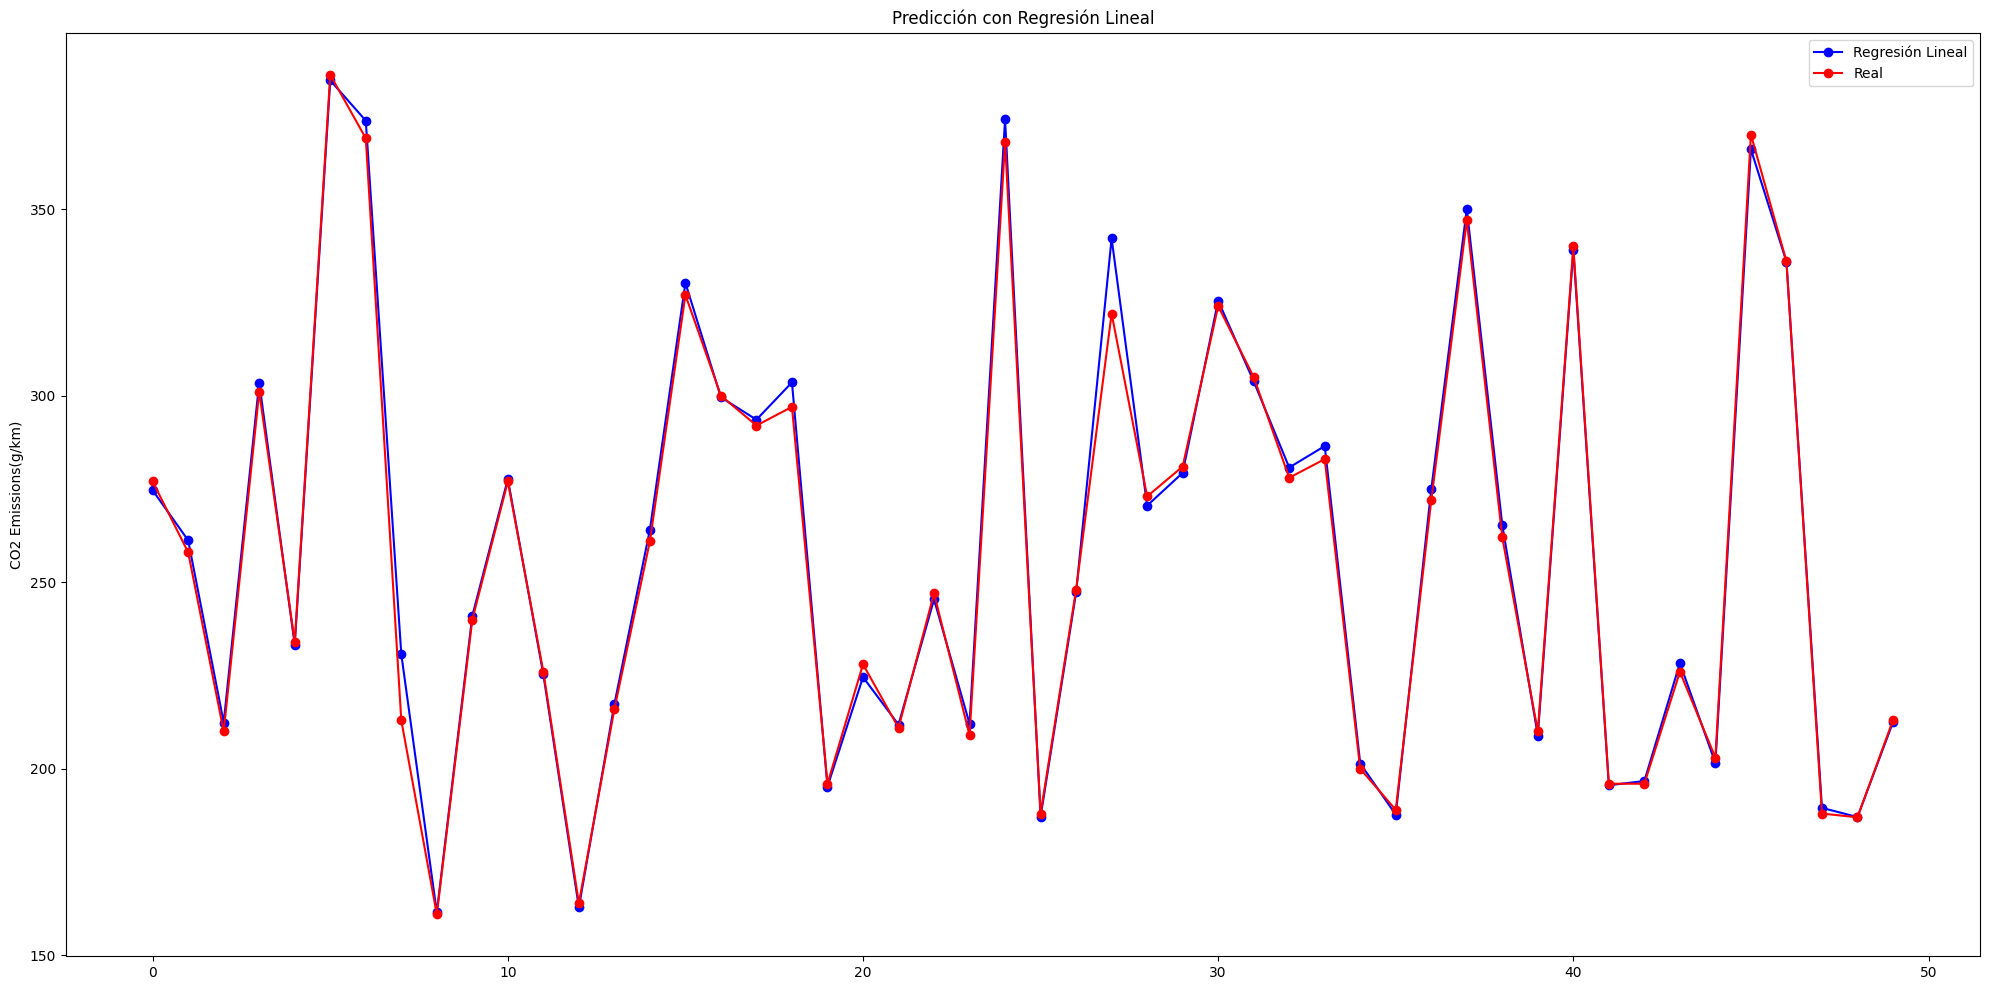

In [38]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred2[:50],'bo-', label='Regresión Lineal')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Predicción con Regresión Lineal',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

## 3.2. Regresión polinomial

Y si intentamos utilizar una Regresión Polinomial?

### 3.2.1. Preparación de los datos.

Realizamos las transformaciones de las variables numéricas y las elevamos al grado correspondiente. Y, realizamos una combinación entre variables para ver si nos ayuda a obtener mayor información.


In [39]:
import itertools

columns = list(set(X_train.columns) - set(num_features))
k = 2 #Grado a evaluar
X_train_pol = pd.concat([X_train[num_features]**(i+1) for i in range(k)],axis=1) #Polinomios sin interacciones
X_train_pol.columns = np.reshape([[i+' '+str(j+1) for i in num_features] for j in range(k)],-1)
temp = pd.concat([X_train[i[0]]*X_train[i[1]] for i in list(itertools.combinations(num_features, 2))],axis=1) #Combinaciones sólo de grado 1
temp.columns = [' '.join(i) for i in list(itertools.combinations(num_features, 2))]
X_train_pol = pd.concat([X_train_pol,temp, X_train[columns]],axis=1)

X_train_pol

,Fuel Consumption Comb (L/100 km) 1,Fuel Consumption Comb (mpg) 1,Fuel Consumption City (L/100 km) 1,Engine Size(L) 1,Cylinders 1,Fuel Consumption Hwy (L/100 km) 1,Fuel Consumption Comb (L/100 km) 2,Fuel Consumption Comb (mpg) 2,Fuel Consumption City (L/100 km) 2,Engine Size(L) 2,...,Make_FORD,Vehicle Class_SUV - SMALL,Vehicle Class_STATION WAGON - MID-SIZE,Fuel Type_Natural Gas,Vehicle Class_MINIVAN,Make_MINI,Make_SMART,Fuel Type_Ethanol,Make_SUBARU,Vehicle Class_COMPACT
3146,11.8,24,13.3,3.8,6,10.1,139.24,576,176.89,14.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4639,11.0,26,12.8,3.6,6,8.7,121.00,676,163.84,12.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5457,9.0,31,9.1,3.0,6,9.0,81.00,961,82.81,9.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,13.1,22,14.5,4.0,6,11.3,171.61,484,210.25,16.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5583,10.0,28,11.1,2.5,4,8.6,100.00,784,123.21,6.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,11.3,25,12.7,2.5,4,9.6,127.69,625,161.29,6.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1354,8.0,35,9.0,1.8,4,6.8,64.00,1225,81.00,3.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,7.4,38,8.1,2.0,4,6.4,54.76,1444,65.61,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5032,15.0,19,17.2,5.2,10,12.3,225.00,361,295.84,27.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2.2. Implementación

In [40]:
PolyModel = LinearRegression().fit(X_train_pol, y_train)
print ('Coefficients: ', PolyModel.coef_)
print ('Intercept: ',PolyModel.intercept_)

Coefficients:  [ 1.08217215e+02  2.25465631e+00 -3.94201918e+01 -7.29345173e+00
 -1.41208235e+01 -1.96565279e+01  1.60874492e+01 -1.26844838e-02
  7.14650589e+00  6.95511609e-01  5.83981484e-01  4.28930986e+00
 -1.58034182e+00 -2.11657657e+01 -1.25643719e-01  1.55786847e+00
 -1.64597709e+01  8.51499657e-01  9.94870487e-02  2.00136577e-01
  4.43797145e-01  4.63996926e-01 -1.28273761e+00  9.00822472e+00
 -1.07634770e+00  1.62546999e-01  4.80617989e-01  5.22062283e-01
 -2.86190302e-01 -4.01369417e-02 -3.44003958e-01  6.27109621e+01
  4.43339228e-01 -1.15148954e+00 -2.01615185e-01 -1.39537086e+00
 -2.13487509e-01 -2.02587661e-01 -1.85092773e-01  4.91769620e-01
  3.04705516e+01  2.69794093e-01  1.33214111e-01  5.07046221e-01
 -1.50497814e+00  4.23310921e-01 -6.19018716e-01  7.26877343e-01
  2.77096756e+00 -9.35768865e-01 -1.04808381e+00 -1.07509373e+00
 -6.08347765e+00  2.24767681e-01 -9.92315126e-01 -4.20502568e-01
  1.06948078e+01  3.07536742e+01  9.33658737e-01  1.55307820e+00
 -3.502188

In [41]:
coef_pol = dict(zip(X_train_pol.columns, PolyModel.coef_))
for k,v in coef_pol.items():
    print(f'{k} = {v:,.2f}')

Fuel Consumption Comb (L/100 km) 1 = 108.22
Fuel Consumption Comb (mpg) 1 = 2.25
Fuel Consumption City (L/100 km) 1 = -39.42
Engine Size(L) 1 = -7.29
Cylinders 1 = -14.12
Fuel Consumption Hwy (L/100 km) 1 = -19.66
Fuel Consumption Comb (L/100 km) 2 = 16.09
Fuel Consumption Comb (mpg) 2 = -0.01
Fuel Consumption City (L/100 km) 2 = 7.15
Engine Size(L) 2 = 0.70
Cylinders 2 = 0.58
Fuel Consumption Hwy (L/100 km) 2 = 4.29
Fuel Consumption Comb (L/100 km) Fuel Consumption Comb (mpg) = -1.58
Fuel Consumption Comb (L/100 km) Fuel Consumption City (L/100 km) = -21.17
Fuel Consumption Comb (L/100 km) Engine Size(L) = -0.13
Fuel Consumption Comb (L/100 km) Cylinders = 1.56
Fuel Consumption Comb (L/100 km) Fuel Consumption Hwy (L/100 km) = -16.46
Fuel Consumption Comb (mpg) Fuel Consumption City (L/100 km) = 0.85
Fuel Consumption Comb (mpg) Engine Size(L) = 0.10
Fuel Consumption Comb (mpg) Cylinders = 0.20
Fuel Consumption Comb (mpg) Fuel Consumption Hwy (L/100 km) = 0.44
Fuel Consumption City (L/

### 3.2.3. Evaluación

In [42]:
y_pred3 = PolyModel.predict(X_train_pol)
y_pred3

array([276.1369724 , 256.97775154, 214.46294537, ..., 201.58020473,
       353.91565765, 249.80583577])

In [43]:
n,p = X_train_pol.shape

print('------------ Regresión Polinomial ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred3))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train,y_pred3) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred3) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred3))*(n-1)/(n-p-1)) )

------------ Regresión Polinomial ------------
Sum of squares (MSE): 13.70
Root of sum of squares (RMSE): 3.70
R2-score: 0.99616
Adj R2-score: 0.99608


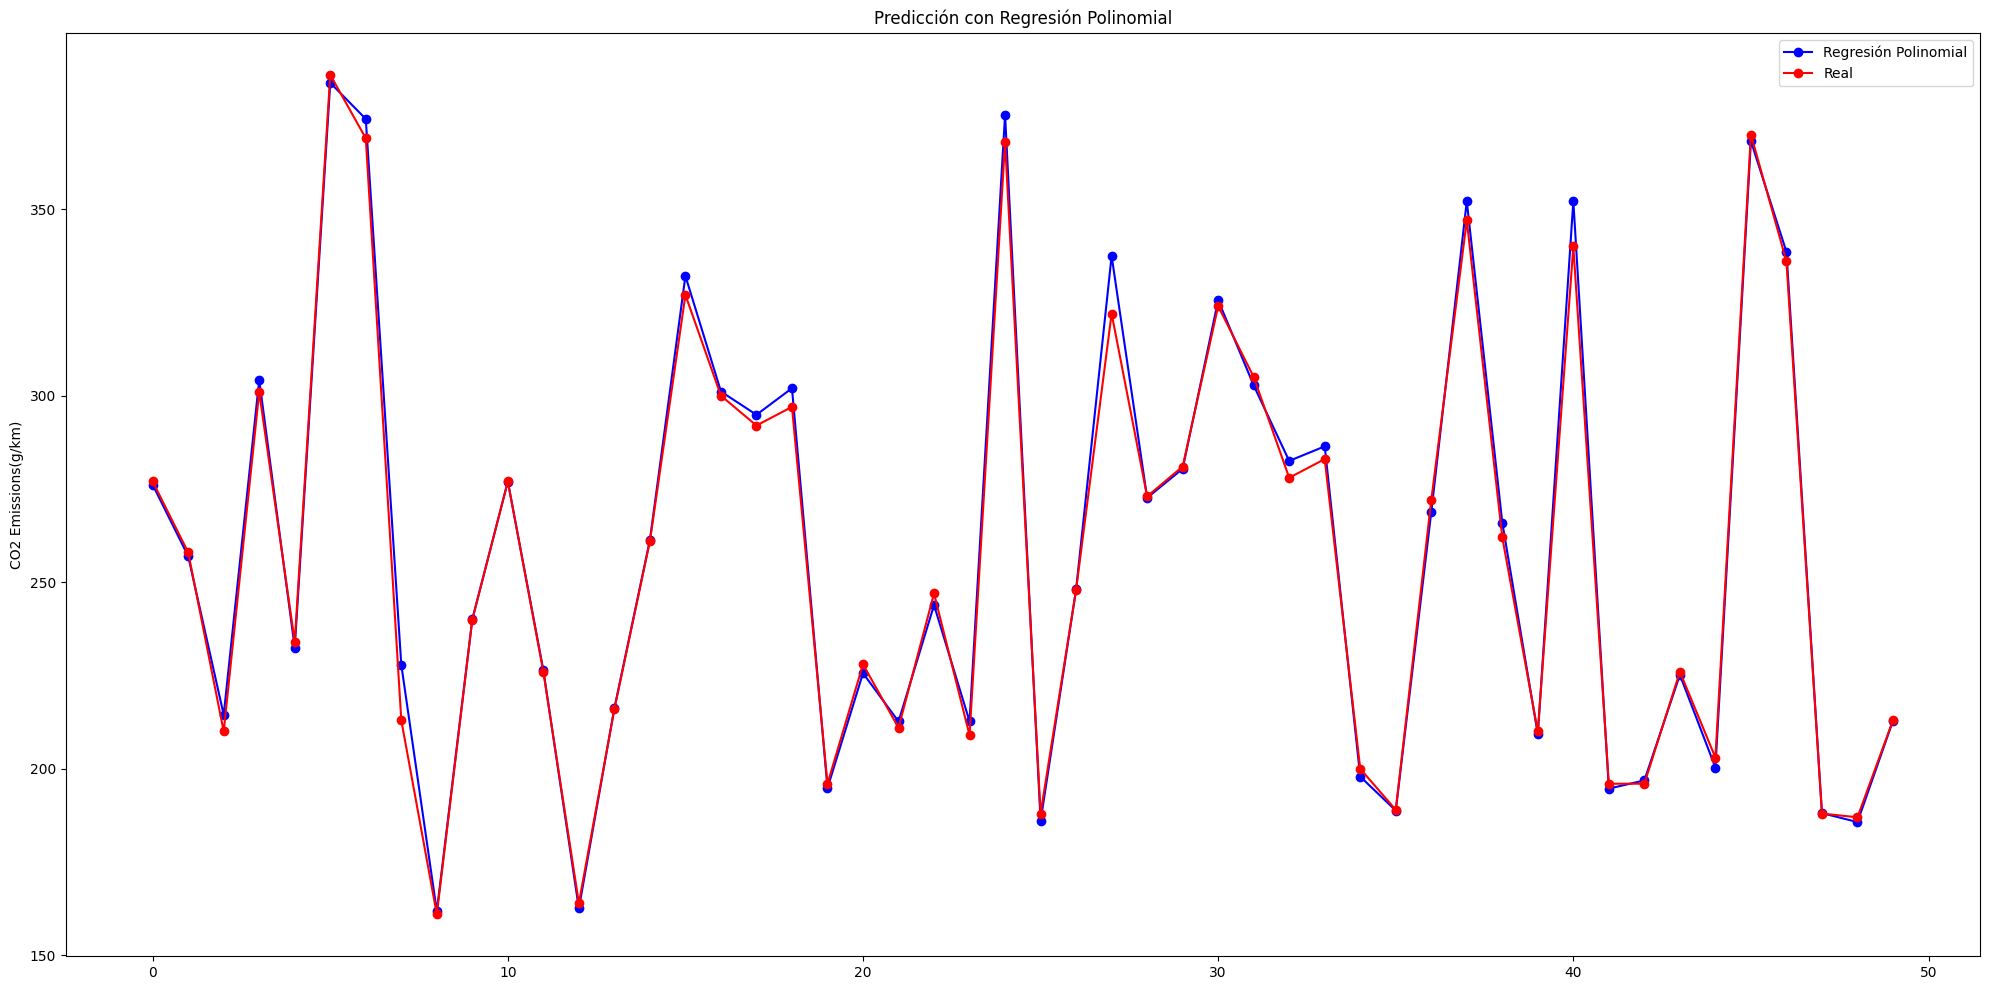

In [44]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred3[:50],'bo-', label='Regresión Polinomial')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Predicción con Regresión Polinomial',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

# 4. Despliegue

Al darnos un mejor resultado, nos deja las siguientes preguntas...
* ¿Qué pasa si realizamos una transformación diferente?
* ¿Qué pasa si le quito las variables que están altamente correlacionadas?
* ¿Qué pasa si aumento el grado de la Regresión Polinomial?

Entre otras...

Al final, todas estas preguntas hacen parte de la 'Selección del modelo'. Y la selección de estos atributos (Normalización, Selección de variables, Grado del polinomio) son lo que se conocen como Hiperparámetros del Modelo.

Por ahora, quedaremos satisfechos con el rendimiento de nuestro último modelo. Ahora, ¿Cómo le irá con datos que el no conoce?

In [45]:
test.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1481,FORD,FIESTA ST,SUBCOMPACT,1.6,4,Manual,Regular Gasoline,8.9,6.8,8.0,35,184
4695,FORD,EDGE,SUV - SMALL,3.5,6,Automatic,Regular Gasoline,13.5,9.1,11.5,25,270
5399,TOYOTA,SEQUOIA 4WD,SUV - STANDARD,5.7,8,Automatic,Regular Gasoline,18.4,13.8,16.4,17,384
4504,BMW,X5 xDRIVE50i,SUV - STANDARD,4.4,8,Automatic,Premium Gasoline,15.4,11.2,13.5,21,317
933,ROLLS-ROYCE,WRAITH,MID-SIZE,6.6,12,Automatic,Premium Gasoline,18.7,11.8,15.6,18,359


Para que nuestro algoritmo entienda los datos que vamos a utilizar, hay que pasar por la etapa de preparación de datos, pero esta vez no aprendiendo los atributos (Como la media o la desviación de los datos, o la selección del grado del polinomio). Sino que utilizaremos lo que ya hemos aprendido antes.

In [46]:
new_test = test.copy()
new_test = new_test.drop(drop_fields, axis=1)
new_test

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1481,FORD,SUBCOMPACT,1.6,4,Manual,Regular Gasoline,8.9,6.8,8.0,35,184
4695,FORD,SUV - SMALL,3.5,6,Automatic,Regular Gasoline,13.5,9.1,11.5,25,270
5399,TOYOTA,SUV - STANDARD,5.7,8,Automatic,Regular Gasoline,18.4,13.8,16.4,17,384
4504,BMW,SUV - STANDARD,4.4,8,Automatic,Premium Gasoline,15.4,11.2,13.5,21,317
933,ROLLS-ROYCE,MID-SIZE,6.6,12,Automatic,Premium Gasoline,18.7,11.8,15.6,18,359
...,...,...,...,...,...,...,...,...,...,...,...
5545,BMW,SUBCOMPACT,3.0,6,Automatic,Premium Gasoline,11.3,8.0,9.8,29,229
4689,FIAT,SUV - SMALL,2.4,4,Automatic,Regular Gasoline,11.0,8.0,9.7,29,226
4326,VOLKSWAGEN,SUBCOMPACT,1.8,4,Automatic,Regular Gasoline,9.7,7.2,8.5,33,199
5160,MERCEDES-BENZ,STATION WAGON - MID-SIZE,3.0,6,Automatic,Premium Gasoline,12.4,9.5,11.1,25,261


In [47]:
X_test, y_test = new_test.drop([target_feature],axis=1), new_test[target_feature]
display(X_test)
y_test

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
1481,FORD,SUBCOMPACT,1.6,4,Manual,Regular Gasoline,8.9,6.8,8.0,35
4695,FORD,SUV - SMALL,3.5,6,Automatic,Regular Gasoline,13.5,9.1,11.5,25
5399,TOYOTA,SUV - STANDARD,5.7,8,Automatic,Regular Gasoline,18.4,13.8,16.4,17
4504,BMW,SUV - STANDARD,4.4,8,Automatic,Premium Gasoline,15.4,11.2,13.5,21
933,ROLLS-ROYCE,MID-SIZE,6.6,12,Automatic,Premium Gasoline,18.7,11.8,15.6,18
...,...,...,...,...,...,...,...,...,...,...
5545,BMW,SUBCOMPACT,3.0,6,Automatic,Premium Gasoline,11.3,8.0,9.8,29
4689,FIAT,SUV - SMALL,2.4,4,Automatic,Regular Gasoline,11.0,8.0,9.7,29
4326,VOLKSWAGEN,SUBCOMPACT,1.8,4,Automatic,Regular Gasoline,9.7,7.2,8.5,33
5160,MERCEDES-BENZ,STATION WAGON - MID-SIZE,3.0,6,Automatic,Premium Gasoline,12.4,9.5,11.1,25


1481    184
4695    270
5399    384
4504    317
933     359
       ... 
5545    229
4689    226
4326    199
5160    261
2770    252
Name: CO2 Emissions(g/km), Length: 1477, dtype: int64

In [48]:
X_trans = pd.DataFrame(enc.transform(X_test[cat_features]).toarray(), columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat([X_trans, X_test[num_features]], axis=1)

X_test

,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,...,Fuel Type_Ethanol,Fuel Type_Natural Gas,Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption City (L/100 km),Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km)
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8.0,35,8.9,1.6,4,6.8
4695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.5,25,13.5,3.5,6,9.1
5399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,16.4,17,18.4,5.7,8,13.8
4504,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,13.5,21,15.4,4.4,8,11.2
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,15.6,18,18.7,6.6,12,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,9.8,29,11.3,3.0,6,8.0
4689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.7,29,11.0,2.4,4,8.0
4326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,8.5,33,9.7,1.8,4,7.2
5160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,11.1,25,12.4,3.0,6,9.5


In [49]:
columns = list(set(X_test.columns) - set(num_features))
k = 2 #Grado a evaluar
X_test_pol = pd.concat([X_test[num_features]**(i+1) for i in range(k)],axis=1) #Polinomios sin interacciones
X_test_pol.columns = np.reshape([[i+' '+str(j+1) for i in num_features] for j in range(k)],-1)
temp = pd.concat([X_test[i[0]]*X_test[i[1]] for i in list(itertools.combinations(num_features, 2))],axis=1) #Combinaciones sólo de grado 1
temp.columns = [' '.join(i) for i in list(itertools.combinations(num_features, 2))]
X_test_pol = pd.concat([X_test_pol,temp, X_test[columns]],axis=1)

X_test_pol.columns

Index(['Fuel Consumption Comb (L/100 km) 1', 'Fuel Consumption Comb (mpg) 1',
       'Fuel Consumption City (L/100 km) 1', 'Engine Size(L) 1', 'Cylinders 1',
       'Fuel Consumption Hwy (L/100 km) 1',
       'Fuel Consumption Comb (L/100 km) 2', 'Fuel Consumption Comb (mpg) 2',
       'Fuel Consumption City (L/100 km) 2', 'Engine Size(L) 2', 'Cylinders 2',
       'Fuel Consumption Hwy (L/100 km) 2',
       'Fuel Consumption Comb (L/100 km) Fuel Consumption Comb (mpg)',
       'Fuel Consumption Comb (L/100 km) Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (L/100 km) Engine Size(L)',
       'Fuel Consumption Comb (L/100 km) Cylinders',
       'Fuel Consumption Comb (L/100 km) Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (mpg) Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (mpg) Engine Size(L)',
       'Fuel Consumption Comb (mpg) Cylinders',
       'Fuel Consumption Comb (mpg) Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumpt

In [50]:
y_pred_test = PolyModel.predict(X_test_pol)
y_pred_test

array([185.95860034, 268.68679343, 374.85260944, ..., 198.06731621,
       259.53250221, 248.22211107])

In [51]:
n,p = X_test_pol.shape

print('------------ Regresión Polinomial ------------')
print("Sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred3))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train,y_pred3) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Polinomial ------------
Sum of squares (MSE): 13.70
Root of sum of squares (RMSE): 3.70
R2-score: 0.99629
Adj R2-score: 0.99605


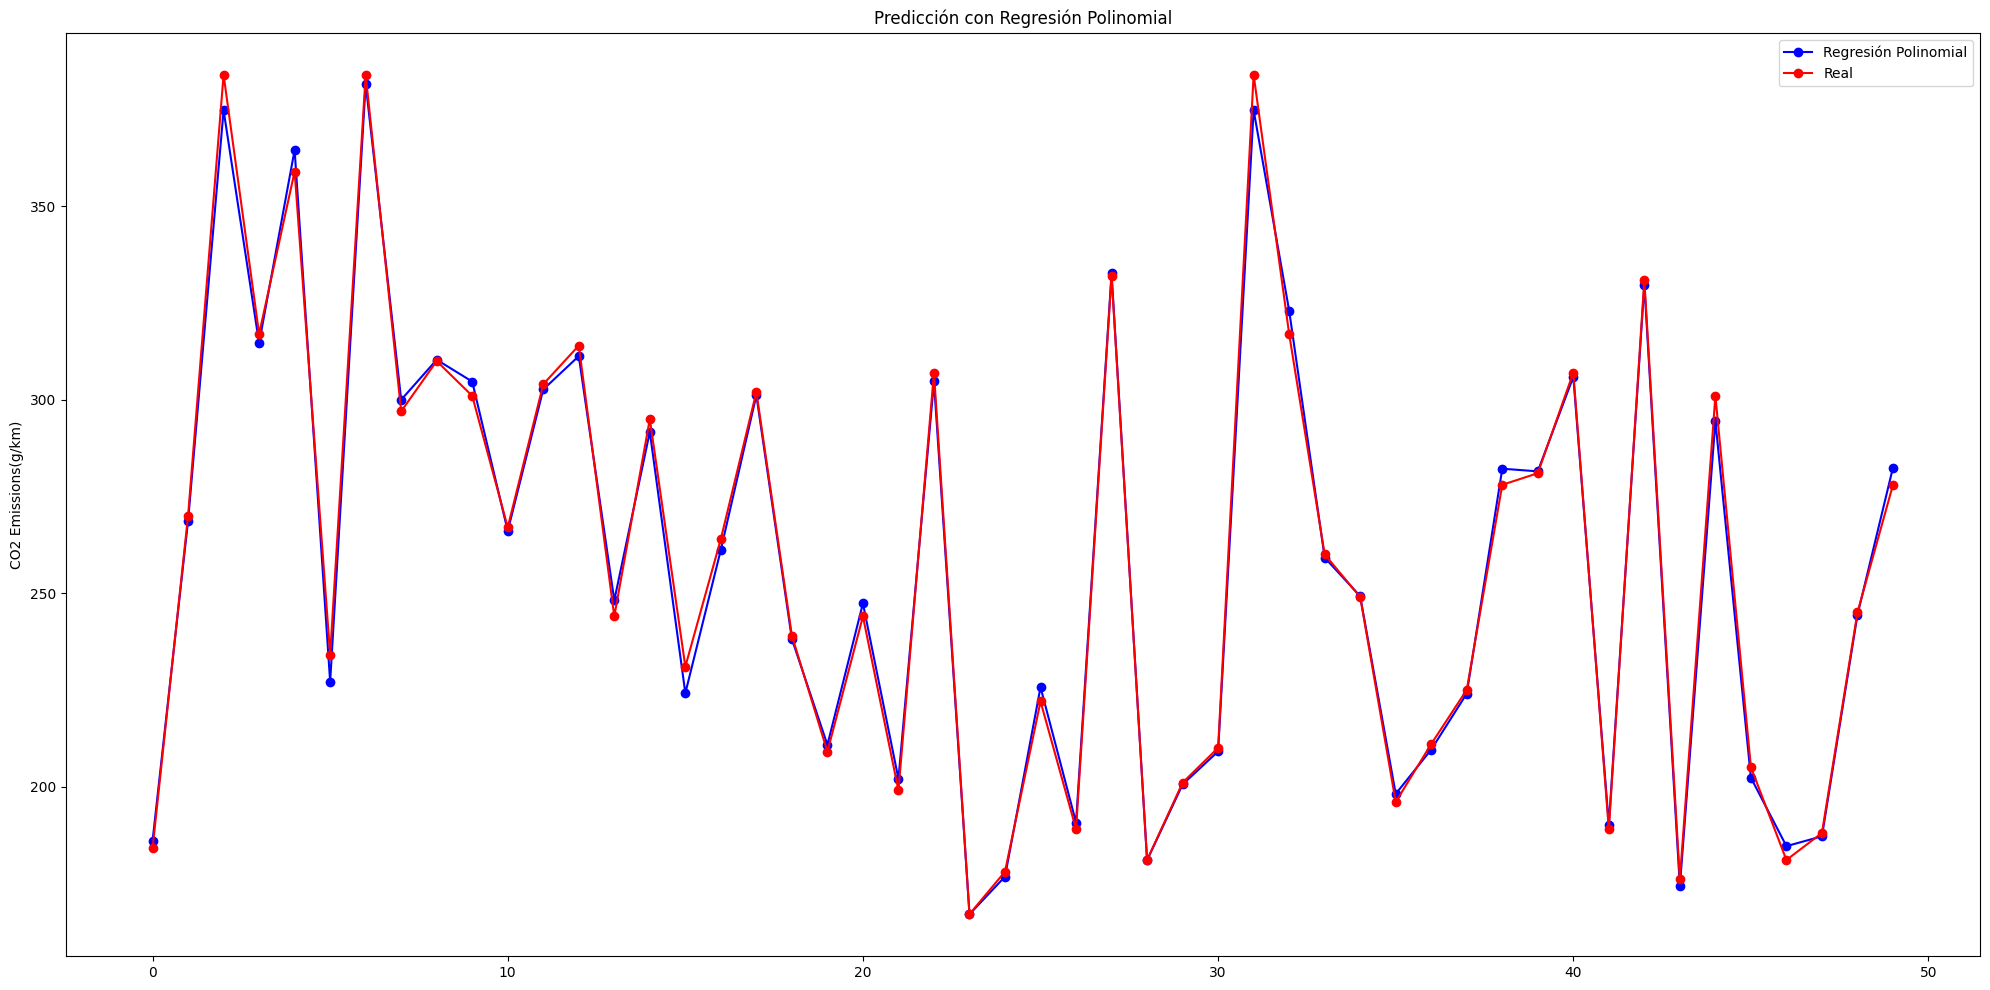

In [52]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_test[:50],'bo-', label='Regresión Polinomial')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Predicción con Regresión Polinomial',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

# 5. Preguntas

- ¿Si se sube el grado del polinomio mejoraría aún más el rendimiento del modelo, habrá algun punto de inflexión? ¿Creen que tuvo efecto la normalización? ¿Cuáles otras técnicas aplicarían?
- ¿Se podría automatizar el proceso? ¿Cómo guardamos nuestro proceso para no volver a entrenar cada vez que querramos realizar una predicción?
- ¿Cómo son los rendimientos de la regresión polinomial en entrenamiento y en producción con datos normalizados?